In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

In [2]:
df=pd.read_csv('product d.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
sales_d= df.drop(['Product Name','Product Category','Month','Year','Market Size', 'Marketing Expense','Month No.',],axis=1)

In [4]:
sales_d.shape

(60, 1)

In [5]:
sales_d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [6]:
sales_d['Sales'].sum()

7173488

Text(0.5, 1.0, 'Product D')

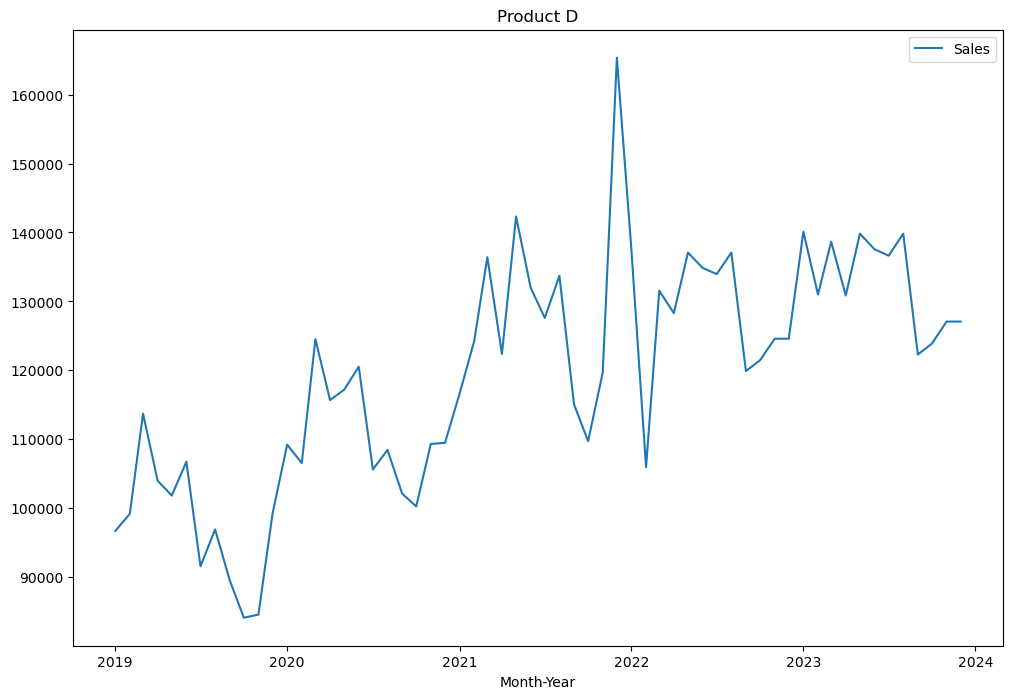

In [7]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_d)
plt.title('Product D')

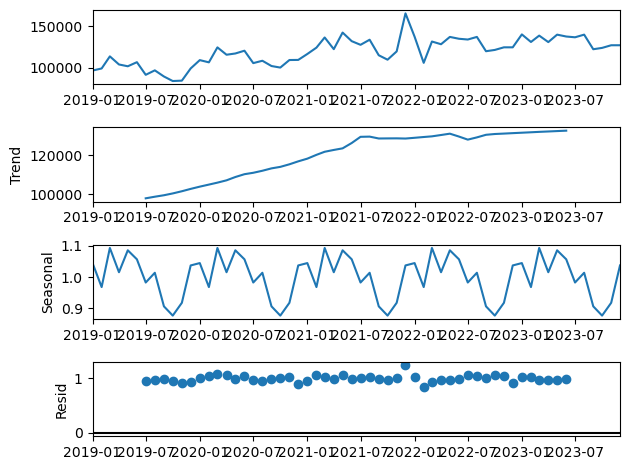

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_d, model='multiplicative', period=12)

# Plot the decomposition
fig = decomposition.plot()
plt.show()


In [9]:
train= sales_d[:48]
test=sales_d[48:]

In [10]:
len(train)

48

In [21]:
model=ExponentialSmoothing(train,trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [22]:
pred=model.forecast(12)

In [23]:
pred

2023-01-01    138471.807262
2023-02-01    129008.362625
2023-03-01    150072.806231
2023-04-01    139899.188602
2023-05-01    150834.091013
2023-06-01    147575.467430
2023-07-01    134475.048136
2023-08-01    140702.362884
2023-09-01    128251.334203
2023-10-01    123181.384596
2023-11-01    130967.224146
2023-12-01    155265.869913
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Product D')

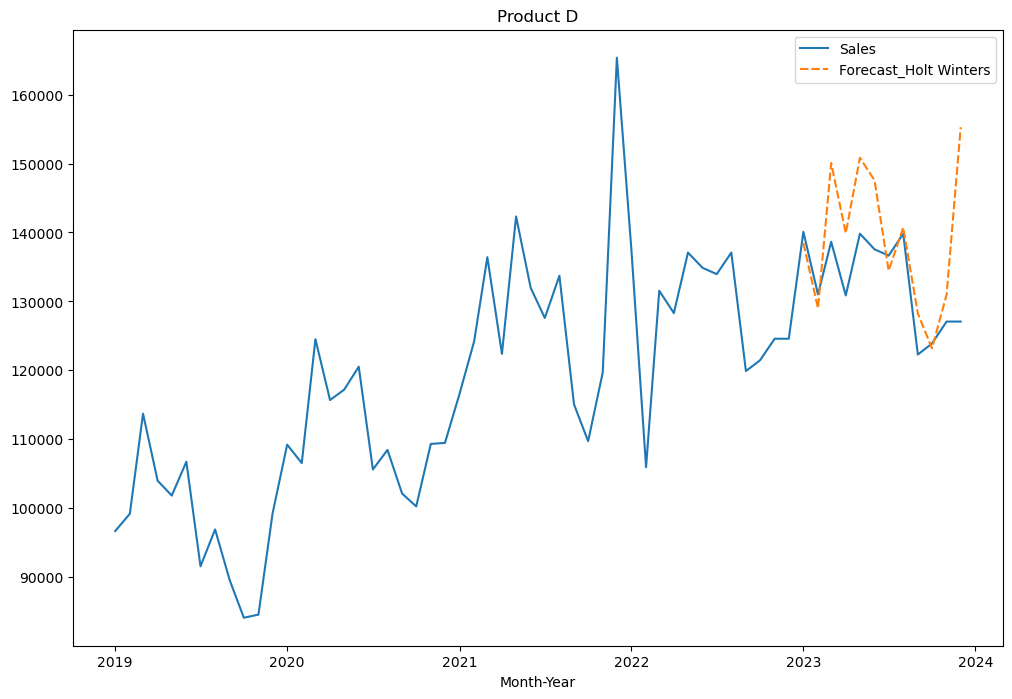

In [24]:
sales_d['Forecast_Holt Winters']=[None]*len(train) + list(pred)
plt.figure(figsize=(12,8))
sns.lineplot(sales_d)
plt.title('Product D')

In [25]:
mae= mean_absolute_error(test,pred)
mse=mean_squared_error(test, pred)
mape= mean_absolute_percentage_error(test,pred)
rmse= np.sqrt(mean_squared_error(test, pred))

print(f'MAE - Holt Winters: {mae}')
print(f'MAPE - Holt Winters: {mape}')
print(f'MSE - Holt Winters: {mse}')
print(f'RMSE - Holt Winters: {rmse}')

MAE - Holt Winters: 7240.811816876275
MAPE - Holt Winters: 0.0548990398513527
MSE - Holt Winters: 107617670.96312751
RMSE - Holt Winters: 10373.89372237481
